<a href="https://colab.research.google.com/github/angelaaaateng/ftw_python/blob/main/NLP_Basics_B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Basics
FTW Batch 8

**Agenda**:
1. Introduction to NLP
2. Tokenization (and NLP Data Prep)
3. Bag-of-Words Representation
4. Simple Example of NLP Data Cleaning and BOW Representation


References:
- https://cssbook.net/chapter10.html
- https://towardsdatascience.com/hands-on-topic-modeling-with-python-1e3466d406d7
- https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html


## Introduction to NLP

- Natural Language Processing is the art of extracting information from unstructured text
- how you can teach machines to understand human languages and extract meaning from text.
- NLP combines computational linguistics—rule-based modeling of human language—with statistical, machine learning, and deep learning models.

Some applications:
- Language Translation
- Dialog Systems / Chatbots
- Sentiment Analysis
- Text Summarizers
- Speech Recognition
- Part of speech tagging
- Named entity recognition





### Data Preprocessing and EDA with NLTK


In [1]:
from IPython.display import clear_output
import pandas as pd
import nltk
from nltk.text import Text
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('book')
clear_output()

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
print(text1)
print(text2)
print(text3)

<Text: Moby Dick by Herman Melville 1851>
<Text: Sense and Sensibility by Jane Austen 1811>
<Text: The Book of Genesis>


### How can we search within the text?
We can examine the "context" in which a word occurs using concordance.

In [4]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [5]:
text1.concordance(["Moby", "Dick"])

Displaying 25 of 83 matches:
[ Moby Dick by Herman Melville 1851 ] ETYMOLOG
le must be the same that some call Moby Dick ." " Moby Dick ?" shouted Ahab . "
same that some call Moby Dick ." " Moby Dick ?" shouted Ahab . " Do ye know the
l . Death and devils ! men , it is Moby Dick ye have seen -- Moby Dick -- Moby 
 , it is Moby Dick ye have seen -- Moby Dick -- Moby Dick !" " Captain Ahab ," 
 Dick ye have seen -- Moby Dick -- Moby Dick !" " Captain Ahab ," said Starbuck
. " Captain Ahab , I have heard of Moby Dick -- but it was not Moby Dick that t
ard of Moby Dick -- but it was not Moby Dick that took off thy leg ?" " Who tol
e , my hearties all round ; it was Moby Dick that dismasted me ; Moby Dick that
 was Moby Dick that dismasted me ; Moby Dick that brought me to this dead stump
he white whale ; a sharp lance for Moby Dick !" " God bless ye ," he seemed to 
the white whale ? art not game for Moby Dick ?" " I am game for his crooked jaw
hful whaleboat ' s bow -- Death to Moby Dick

In [6]:
# we can store these results in a concordance list:
con_list = text1.concordance_list("monstrous")
print(len(con_list))
print(con_list[3].line)

11
d as you gazed , and wondered what monstrous cannibal and savage could ever hav


Where is the location of a word within the text?

- Lexical Dispersion Plot for Words in U.S. Presidential Inaugural Addresses: This can be used to investigate changes in language use over time.
- Each stripe represents an instance of a word, and each row represents the entire text.
- Striking patterns of word usage over the last 220 years (in an artificial text constructed by joining the texts of the Inaugural Address Corpus end-to-end). --> US presidential inaugural address texts, and metadata (for the corpus), from 1789 to present.

<Text: Inaugural Address Corpus>


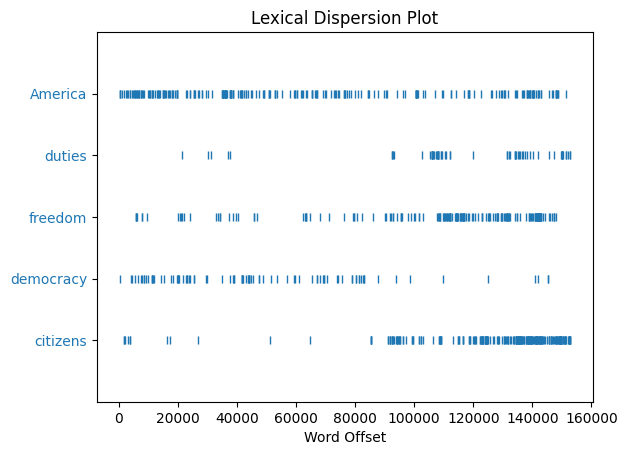

In [7]:
print(text4)
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

### Counting Vocabulary

What is the length of a text from start to finish, in terms of the words and punctuation symbols that appear.

A token is the technical name for a sequence of characters — such as hairy, his, or :) — that we want to treat as a group

In [8]:
print(text1)
len(text1)

<Text: Moby Dick by Herman Melville 1851>


260819

In [9]:
print(text3)
len(text3)

<Text: The Book of Genesis>


44764

How lexically "rich" is the text?
- what portion of the tokens are unique?

In [10]:
len(set(text1)) / len(text1)

0.07406285585022564

We can count how often a word occurs in a text, and compute what percentage of the text is taken up by a specific word

In [11]:
text1.count("Moby")

84

In [12]:
100 * text1.count('Moby') / len(text1)

0.032206242643365704

### Simple Statistics with Text: Frequency Distributions

- can we automatically identify the words of a text that are most informative about the topic and genre of the text?

In [13]:
print(text1.tokens[:20])

['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']', 'ETYMOLOGY', '.', '(', 'Supplied', 'by', 'a', 'Late', 'Consumptive', 'Usher', 'to', 'a', 'Grammar']


In [14]:
fdist1 = FreqDist(text1)
fdist1

FreqDist({',': 18713, 'the': 13721, '.': 6862, 'of': 6536, 'and': 6024, 'a': 4569, 'to': 4542, ';': 4072, 'in': 3916, 'that': 2982, ...})

- It is a "distribution" because it tells us how the total number of word tokens in the text are distributed across the vocabulary items

In [15]:
fdist1.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

In [16]:
fdist1['whale']

906

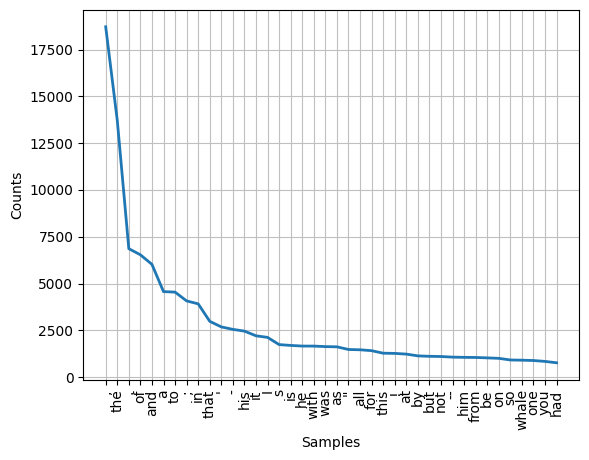

<Axes: xlabel='Samples', ylabel='Counts'>

In [17]:
fdist1.plot(40)

## Tokenization

- How can we represent words in a way that a computer can process them?
- Splitting text into smaller units
- Tokenization is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either words, characters, or subwords. Hence, tokenization can be broadly classified into 3 types – word, character, and subword (n-gram characters) tokenization.
- Tokenization is the process of breaking down a piece of text, like a sentence or a paragraph, into individual words or “tokens.” These tokens are the basic building blocks of language, and tokenization helps computers understand and process human language by splitting it into manageable units.
- Word Tokenization is the most commonly used tokenization algorithm. It splits a piece of text into individual words based on a certain delimiter. Depending upon delimiters, different word-level tokens are formed.

**Drawbacks of Word Tokenization:**
- Out of Vocabulary Words

In [18]:
sentence = """I am learning so much during my time at FTW! I love data science"""
tokens = nltk.word_tokenize(sentence)
tokens

['I',
 'am',
 'learning',
 'so',
 'much',
 'during',
 'my',
 'time',
 'at',
 'FTW',
 '!',
 'I',
 'love',
 'data',
 'science']

In [39]:
from sklearn.feature_extraction.text import CountVectorizer


text = "We love learning data science at FTW"
tokenizer = CountVectorizer().build_tokenizer()
print(tokenizer(text))

['We', 'love', 'learning', 'data', 'science', 'at', 'FTW']


## BOW Representation

- Traditional NLP approaches such as Count Vectorizer use vocabulary as features. Each word in the vocabulary is treated as a unique feature


In [20]:
# document frequency matrix

texts = [
    "The caged bird sings with a fearful trill",
    "for the caged bird sings of freedom",
    "I really really really like ice cream"
]
cv = CountVectorizer()
count_matrix = cv.fit_transform(texts)
count_array = count_matrix.toarray()

# Create a dataframe of the word counts to inspect
# - todense transforms the dtm into a dense matrix
# - get_feature_names() gives a list words
pd.DataFrame(count_matrix.todense(), columns=cv.get_feature_names_out())

,bird,caged,cream,fearful,for,freedom,ice,like,of,really,sings,the,trill,with
0,1,1,0,1,0,0,0,0,0,0,1,1,1,1
1,1,1,0,0,1,1,0,0,1,0,1,1,0,0
2,0,0,1,0,0,0,1,1,0,3,0,0,0,0


In [40]:
count_array

array([[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 1, 0, 3, 0, 0, 0, 0]])

In [41]:
count_matrix

<3x14 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

3 documents (rows) and 14 features (columns)

# Sample Minidatset: Disneyland Reviews

- https://www.kaggle.com/datasets/arushchillar/disneyland-reviews


In [21]:
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
# LOAD DATA
reviews = pd.read_csv('https://raw.githubusercontent.com/angelaaaateng/ftw_python/main/DisneylandReviews.csv', encoding='latin-1')
reviews = reviews.dropna()
reviews

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [23]:
reviews = reviews[["Review_Text", "Rating"]]
# We'll only work with these 2 columns
reviews = reviews.drop_duplicates(subset='Review_Text')
reviews

,Review_Text,Rating
0,If you've ever been to Disneyland anywhere you...,4
1,Its been a while since d last time we visit HK...,4
2,Thanks God it wasn t too hot or too humid wh...,4
3,HK Disneyland is a great compact park. Unfortu...,4
4,"the location is not in the city, took around 1...",4
...,...,...
42651,i went to disneyland paris in july 03 and thou...,5
42652,2 adults and 1 child of 11 visited Disneyland ...,5
42653,My eleven year old daughter and myself went to...,5
42654,"This hotel, part of the Disneyland Paris compl...",4


<Axes: xlabel='Rating', ylabel='count'>

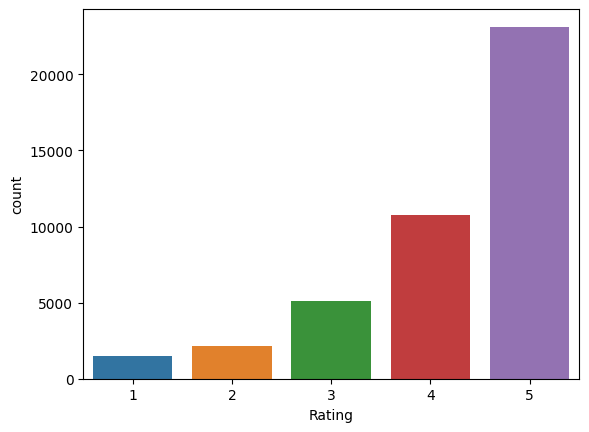

In [24]:
import seaborn as sns
sns.countplot(x='Rating', data=reviews)

### Basic Data Cleaning

- Lowercase each word
- Replace contractions with their longer forms
- Remove special characters and unwanted words
- Tokenize each word by using nltk.WordPunctTokenizer() we will extract tokens from strings of words or sentences.
- Lemmatize each word by using nltk.stem.WordNetLemmatizer() we will restore words to their dictionary forms so all words with similar meanings will be linked to one word.
  - Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma
  - car, cars, car's, cars' $\Rightarrow$ car

In [25]:
# DATA CLEANING AND PRE PROCESSING


# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [26]:
import re

def text_preprocessing(text):
    '''
    Remove unwanted characters,
    stopwords, and format the text to
    create fewer nulls word embeddings
    '''

    # Convert words to lower case
    text = text.lower()

    # Expand contractions
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
              # note that contractions is a dictionary
              new_text.append(contractions[word])
            else:
              new_text.append(word)
        text = " ".join(new_text)

    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\'', ' ', text)

    # this line of code is used to remove URLs from the text variable.
    # It searches for patterns that match common URL formats
    # (starting with "http" or "https" and containing the "://" delimiter)
    # and replaces them with an empty string, effectively deleting the URLs
    # from the text. The use of re.MULTILINE ensures that it operates on each
    # line of the text separately.

    # Tokenize each word
    text = nltk.WordPunctTokenizer().tokenize(text)

    # Lemmatize each word
    text = [nltk.stem.WordNetLemmatizer().lemmatize(token, pos='v') for token in text if len(token)>1]

    # For each token in the text, the code applies lemmatization using the WordNetLemmatizer.
    # The lemmatize function is used to find the base or dictionary form of a word (the lemma).
    # The pos='v' argument specifies that it should lemmatize the token as a verb.


    return text

In [27]:
def to_string(text):
    # Convert list to string
    text = ' '.join(map(str, text))

    return text

# Create a list of review by applying text_preprocessing function
reviews['Review_Clean_List'] = list(map(text_preprocessing, reviews.Review_Text))

# list comprehension that processes each element in the 'Review_Text'
# column using the 'text_preprocessing' function.
# The map function applies the 'text_preprocessing' function to each
# element in the 'Review_Text' column of the 'reviews' DataFrame.
# This effectively applies the 'text_preprocessing'
# function to each text review in the 'Review_Text' column.


# Return to string with to_string function
reviews['Review_Clean'] = list(map(to_string, reviews['Review_Clean_List']))

In [28]:
pd.set_option('display.max_colwidth', 15000)
reviews.head()

,Review_Text,Rating,Review_Clean_List,Review_Clean
0,If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides its a Small World is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well.,4,"[if, you, ve, ever, be, to, disneyland, anywhere, you, will, find, disneyland, hong, kong, very, similar, in, the, layout, when, you, walk, into, main, street, it, have, very, familiar, feel, one, of, the, rid, its, small, world, be, absolutely, fabulous, and, worth, do, the, day, we, visit, be, fairly, hot, and, relatively, busy, but, the, queue, move, fairly, well]",if you ve ever be to disneyland anywhere you will find disneyland hong kong very similar in the layout when you walk into main street it have very familiar feel one of the rid its small world be absolutely fabulous and worth do the day we visit be fairly hot and relatively busy but the queue move fairly well
1,"Its been a while since d last time we visit HK Disneyland .. Yet, this time we only stay in Tomorrowland .. AKA Marvel land!Now they have Iron Man Experience n d Newly open Ant Man n d Wasp!!Ironman .. Great feature n so Exciting, especially d whole scenery of HK (HK central area to Kowloon)!Antman .. Changed by previous Buzz lightyear! More or less d same, but I'm expecting to have something most!!However, my boys like it!!Space Mountain .. Turns into Star Wars!! This 1 is Great!!!For cast members (staffs) .. Felt bit MINUS point from before!!! Just dun feel like its a Disney brand!! Seems more local like Ocean Park or even worst!!They got no SMILING face, but just wanna u to enter n attraction n leave!!Hello this is supposed to be Happiest Place on Earth brand!! But, just really Dont feel it!!Bakery in Main Street now have more attractive delicacies n Disney theme sweets .. These are Good Points!!Last, they also have Starbucks now inside the theme park!!",4,"[its, be, while, since, last, time, we, visit, hk, disneyland, .., yet, this, time, we, only, stay, in, tomorrowland, .., aka, marvel, land, now, they, have, iron, man, experience, newly, open, ant, man, wasp, !!, ironman, .., great, feature, so, excite, especially, whole, scenery, of, hk, hk, central, area, to, kowloon, )!, antman, .., change, by, previous, buzz, lightyear, more, or, less, same, but, be, expect, to, have, something, most, !!, however, my, boys, like, it, !!, space, mountain, .., turn, into, star, war, !!, this, be, great, !!!, for, cast, members, staff, .., felt, bite, minus, point, from, before, ...]",its be while since last time we visit hk disneyland .. yet this time we only stay in tomorrowland .. aka marvel land now they have iron man experience newly open ant man wasp !! ironman .. great feature so excite especially whole scenery of hk hk central area to kowloon )! antman .. change by previous buzz lightyear more or less same but be expect to have something most !! however my boys like it !! space mountain .. turn into star war !! this be great !!! for cast members staff .. felt bite minus point from before !!! just dun feel like its disney brand !! seem more local like ocean park or even worst !! they get no smile face but just wanna to enter attraction leave !! hello this be suppose to be happiest place on earth brand !! but just really dont feel it !! bakery in main street now have more attractive delicacies disney theme sweets .. these be good point !! last they also have starbucks now inside the theme park !!
2,"Thanks God it wasn t too hot or too humid when I was visiting the park otherwise it would be a big issue (there is not a lot of shade).I have arrived around 10:30am and left at 6pm. Unfortunately I didn t last until evening parade, but 8.5 hours was too much for me.There is plenty to do and everyone will find something interesting for themselves to enjoy.It wasn t extremely busy and the l

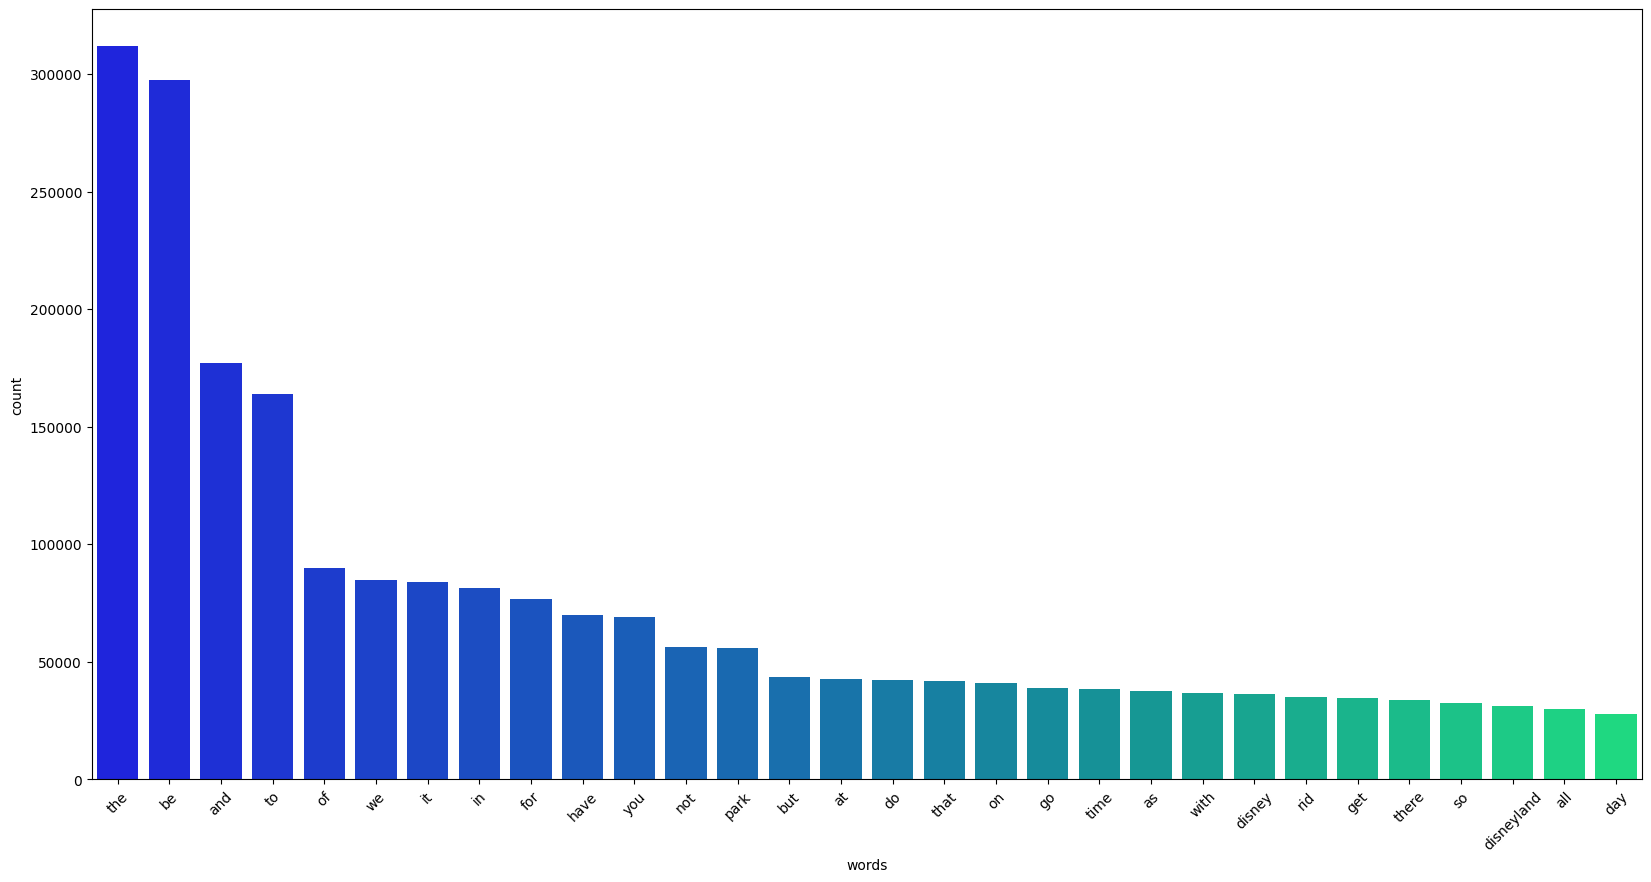

In [29]:
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Join  text together
review_words = ','.join(list(reviews['Review_Clean'].values))

# Count each word
Counter = Counter(review_words.split())
most_frequent = Counter.most_common(30)

fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);

In [30]:
stopwords_list = stopwords.words('english')
stopwords_list.extend(['park', 'disney', 'disneyland'])

In [31]:
reviews['Review_Clean_List'] = [[word for word in line if word not in stopwords_list] for line in reviews['Review_Clean_List']]

In [32]:
reviews['Review_Clean'] = list(map(to_string, reviews['Review_Clean_List']))

In [33]:
reviews.head(2)

,Review_Text,Rating,Review_Clean_List,Review_Clean
0,If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides its a Small World is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well.,4,"[ever, anywhere, find, hong, kong, similar, layout, walk, main, street, familiar, feel, one, rid, small, world, absolutely, fabulous, worth, day, visit, fairly, hot, relatively, busy, queue, move, fairly, well]",ever anywhere find hong kong similar layout walk main street familiar feel one rid small world absolutely fabulous worth day visit fairly hot relatively busy queue move fairly well
1,"Its been a while since d last time we visit HK Disneyland .. Yet, this time we only stay in Tomorrowland .. AKA Marvel land!Now they have Iron Man Experience n d Newly open Ant Man n d Wasp!!Ironman .. Great feature n so Exciting, especially d whole scenery of HK (HK central area to Kowloon)!Antman .. Changed by previous Buzz lightyear! More or less d same, but I'm expecting to have something most!!However, my boys like it!!Space Mountain .. Turns into Star Wars!! This 1 is Great!!!For cast members (staffs) .. Felt bit MINUS point from before!!! Just dun feel like its a Disney brand!! Seems more local like Ocean Park or even worst!!They got no SMILING face, but just wanna u to enter n attraction n leave!!Hello this is supposed to be Happiest Place on Earth brand!! But, just really Dont feel it!!Bakery in Main Street now have more attractive delicacies n Disney theme sweets .. These are Good Points!!Last, they also have Starbucks now inside the theme park!!",4,"[since, last, time, visit, hk, .., yet, time, stay, tomorrowland, .., aka, marvel, land, iron, man, experience, newly, open, ant, man, wasp, !!, ironman, .., great, feature, excite, especially, whole, scenery, hk, hk, central, area, kowloon, )!, antman, .., change, previous, buzz, lightyear, less, expect, something, !!, however, boys, like, !!, space, mountain, .., turn, star, war, !!, great, !!!, cast, members, staff, .., felt, bite, minus, point, !!!, dun, feel, like, brand, !!, seem, local, like, ocean, even, worst, !!, get, smile, face, wanna, enter, attraction, leave, !!, hello, suppose, happiest, place, earth, brand, !!, really, dont, feel, !!, ...]",since last time visit hk .. yet time stay tomorrowland .. aka marvel land iron man experience newly open ant man wasp !! ironman .. great feature excite especially whole scenery hk hk central area kowloon )! antman .. change previous buzz lightyear less expect something !! however boys like !! space mountain .. turn star war !! great !!! cast members staff .. felt bite minus point !!! dun feel like brand !! seem local like ocean even worst !! get smile face wanna enter attraction leave !! hello suppose happiest place earth brand !! really dont feel !! bakery main street attractive delicacies theme sweets .. good point !! last also starbucks inside theme !!


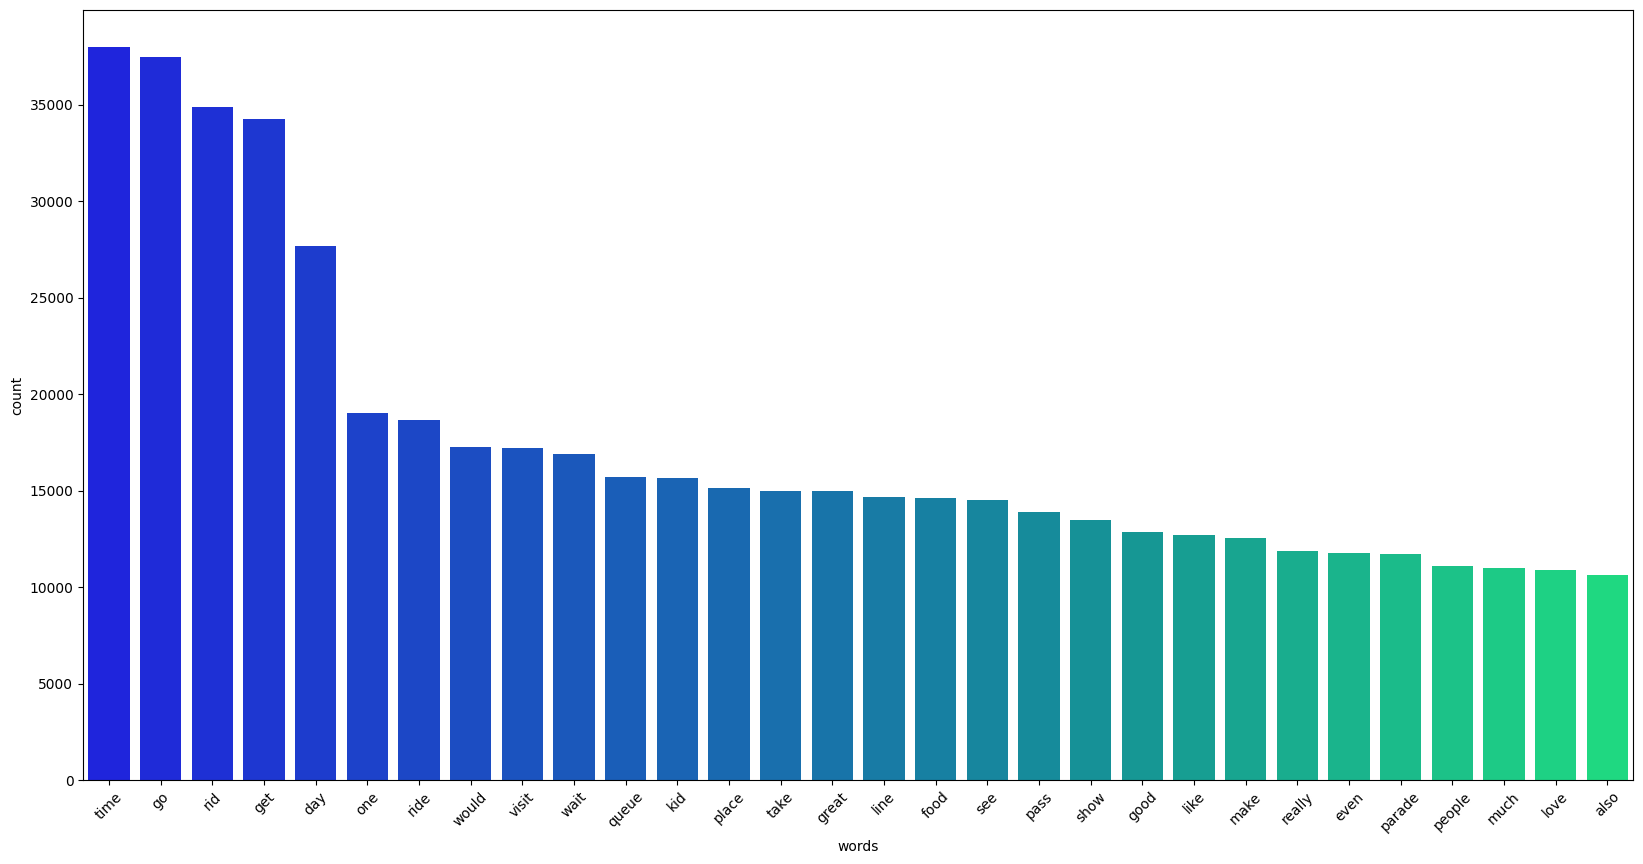

In [34]:
from collections import Counter

# Join  text together
review_words = ','.join(list(reviews['Review_Clean'].values))

# Count each word
Counter = Counter(review_words.split())
most_frequent = Counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);

In [35]:
# 1. Extract the text data from the DataFrame
text_data = reviews['Review_Clean'].head(1000)
# note that doing this for really large datasets may not be manageable
# we could then use other text / word representation techniques

# 2. Initialize the CountVectorizer
count_vectorizer = CountVectorizer()

# 3. Fit and transform the text data using CountVectorizer
bow_representation = count_vectorizer.fit_transform(text_data)

# 4. Convert the BoW matrix to a DataFrame
bow_df = pd.DataFrame(bow_representation.toarray(), columns=count_vectorizer.get_feature_names_out())

# 5. (Optional) Add the BoW DataFrame to your original DataFrame
df_with_bow = pd.concat([reviews, bow_df], axis=1)

In [36]:
bow_df

,00,00am,00pmbeside,02,09,10,100,1000,100hk,101,...,youths,yr,yrs,yum,yummy,zealand,zebras,zone,zoo,zootopia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
